# Laboratorul 6<br>



In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parametrii distribuției a priori
alpha_prior = 1  # Alege un alpha inițial (de ex., 1)
beta_prior = 1   # Alege un beta inițial (de ex., 1)

# Parametrii observațiilor
num_apeluri = 180
num_ore = 10

# Parametrii distribuției a posteriori
alpha_posterior = alpha_prior + num_apeluri
beta_posterior = beta_prior + num_ore

# Generăm valori din distribuția a posteriori Gamma
posterior_samples = np.random.gamma(alpha_posterior, 1/beta_posterior, 10000)

# Calculăm percentilii pentru intervalul de credibilitate de 94%
lower_bound = np.percentile(posterior_samples, 3)
upper_bound = np.percentile(posterior_samples, 97)

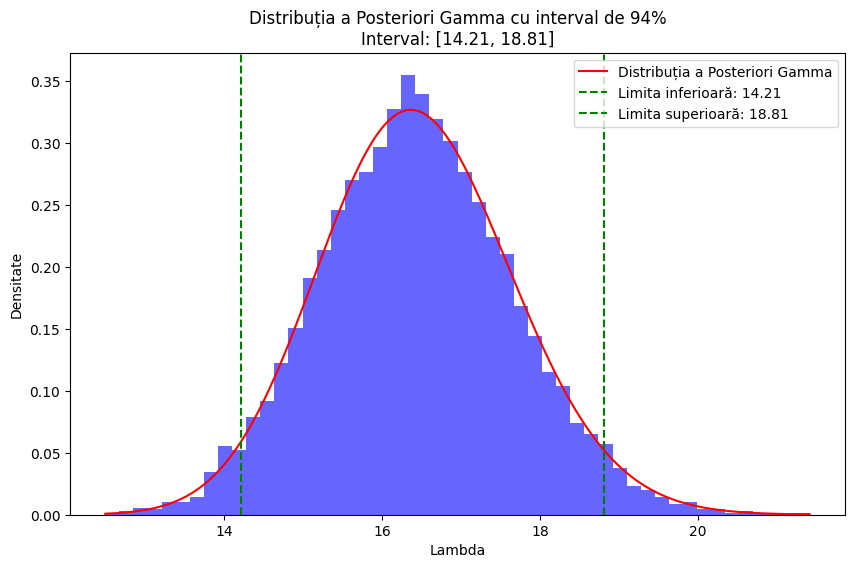

Modulul distribuției a posteriori: 16.36
Intervalul de credibilitate de 94%: [14.21, 18.81]


In [5]:
plt.figure(figsize=(10, 6))
plt.hist(posterior_samples, bins=50, density=True, alpha=0.6, color='blue')
x = np.linspace(min(posterior_samples), max(posterior_samples), 1000)
y = stats.gamma.pdf(x, alpha_posterior, scale=1/beta_posterior)
plt.plot(x, y, 'r-', label='Distribuția a Posteriori Gamma')

plt.axvline(lower_bound, color='green', linestyle='--', label=f'Limita inferioară: {lower_bound:.2f}')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'Limita superioară: {upper_bound:.2f}')
plt.title(f'Distribuția a Posteriori Gamma cu interval de 94%\nInterval: [{lower_bound:.2f}, {upper_bound:.2f}]')
plt.xlabel('Lambda')
plt.ylabel('Densitate')
plt.legend()
plt.show()

# Cea mai probabilă valoare (modulul)
mode = (alpha_posterior - 1) / beta_posterior if alpha_posterior > 1 else None
print(f'Modulul distribuției a posteriori: {mode:.2f}')
print(f'Intervalul de credibilitate de 94%: [{lower_bound:.2f}, {upper_bound:.2f}]')